******************************
# Pocket Algorithm
******************************

This is fundamentally a perceptron that learns with **"memory"** by utilizing the result of its last iteration

In [104]:
x1 <- (-5)
y1 <- (-1)
x2 <- 3
y2 <- 4

This code will be classifying objects according to an arbitrary line and coloring those points on either side of it.

In [105]:
x <- runif(2, min = x1, max = x2)
y <- runif(2, min = y1, max = y2)
fit <- (lm(y~x))

This **t** variable is nothing but the intercept and bias from the fitline above.

In [106]:
t <- summary(fit)$coefficients[,1]
t

(Intercept)           x 
   1.466626   -2.460540

This f function receive tuple object and returns a y value dpendent on this variable. It follows the format of $$y(x)=m*x+b$$

In [107]:
f <- function(x){
  t[2]*x + t[1]
}
f(1)

x 
-0.9939142

# Now we have produced

1) N number of data points

2) A 2 row matrix random entries

3) A 1 row matrix of hot encoded values dependent on what side of the line they are on


In [108]:
N <- 100
A <- matrix(ncol=N, nrow=2)
b <- matrix(ncol=N, nrow=1)
for(i in 1:N){
  A[, i] <- c(runif(2, min = x1, max = x2))
  b[1, i] <- sign(A[2, i] - f(A[1, i]))
}
head(A)
head(b)

-3.0643039,2.040262,1.892646,2.044367535,1.252871,-1.624177,2.6192646,-0.1624643,-4.91544,0.4841827,...,-4.8829618,-4.9275314,-0.4652072,-2.681530,0.6728986,-1.829159,1.758830,-1.730044,-1.435022,-1.123573
0.9212645,-3.873639,-1.349345,-0.009859994,-2.723019,-2.442945,-0.5942577,2.3976185,2.58259,-1.5493467,...,-0.1481438,0.3187433,-1.0137127,-3.489872,-1.3098614,-3.132410,2.813195,-4.472666,1.879888,-3.779905


-1,-1,1,1,-1,-1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1


# Visualizing the Data and Fit Line

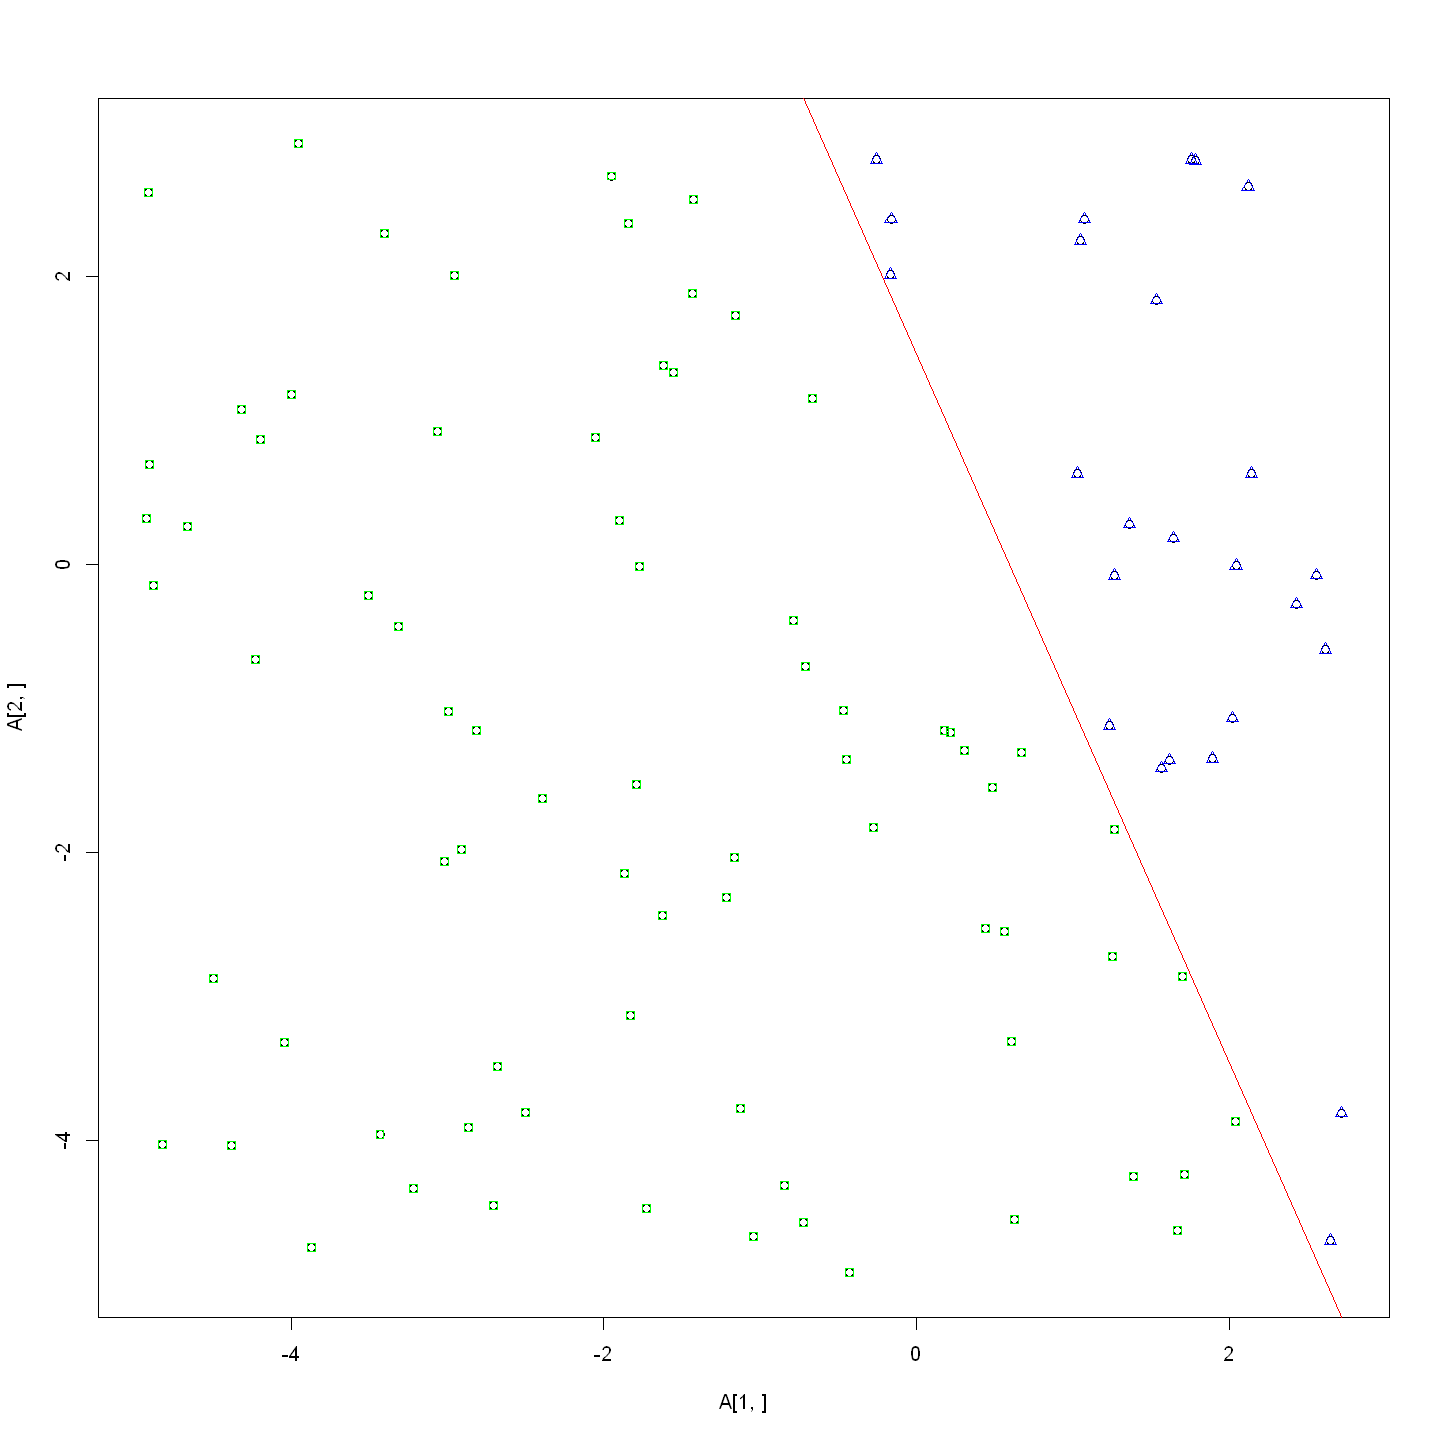

In [109]:
library(repr)
library(ggplot2)

options(repr.plot.width=12, repr.plot.height=12)
plot(A[1, ], A[2, ]) # plot(x,y) format
abline(fit,col="red") 
k=which(b==1)
m=which(b==-1)
points(A[1,k], A[2,k], col="blue",  pch = 24)
points(A[1,m], A[2,m], col="green", pch = 22)

# Initialize Random Weights

In [110]:
w <- rep(0,3)
print(w)

[1] 0 0 0


Now we need a function that will approximate he one hot encoded value that already exist by accepting just the weights. The g function that we have below is going to be adjusted intermittently until it mimicks F perfectly.

1) **t(w)** is the transpose of w which is our vector

2) the %*% is our matrix multiplication operator

In [111]:
g <- function(z){
    t(w) %*% z
}

# Code
The majority of this code was used from reference but is broken into these portions
***
### Update Rule
***
* j is a single sample number used to index A later.

**First if loop**

* if the sign returned by the hypothesis function matches both 0 and its similar one hot encoded value the weight adds w in the brackets after.

**For Loop**
* If the sign of the sampled point equals its actual weight the formula after returns a proportion of the time the preiction function is correct.
* If this works correctly this list will be a min followed by increasing values

**Last if Loop**
* if the very last iteration is the MAX training accuracy yet, it is set as the new "memory"
* iterate i by one to continue until the bbreak value in the while loop
* lastly the final training accuracy is the best

In [112]:
w_pocket <- w
training_accuracy <- 0 
pocket_accuracy <- 0
i_pocket <-0
i <- 1

while(i < 2*N+1){
    
  j = sample(1:N, 1)
    # Update Rule
  if((sign(g(c(1, A[, j]))) == b[1, j]) == 0){
      
    w <- w + b[1, j]*c(1, A[, j])
  }
    
  training_accuracy<-c(training_accuracy,0)

    # Training Record
  for(k in 1:N){
    if(sign(g(c(1, A[,k ]))) == b[, k]){
      training_accuracy[length(training_accuracy)] <- training_accuracy[length(training_accuracy)] + 1/N
    }
  }
    # Retain best memory of weights
  if(tail(training_accuracy,1)>max(head(training_accuracy,-1))){
    w_pocket<-w
    i_pocket<-i
    pocket_accuracy<- tail(training_accuracy,1)
  }
    
  i = i + 1

}

final_training_accuracy <- tail(training_accuracy,1)

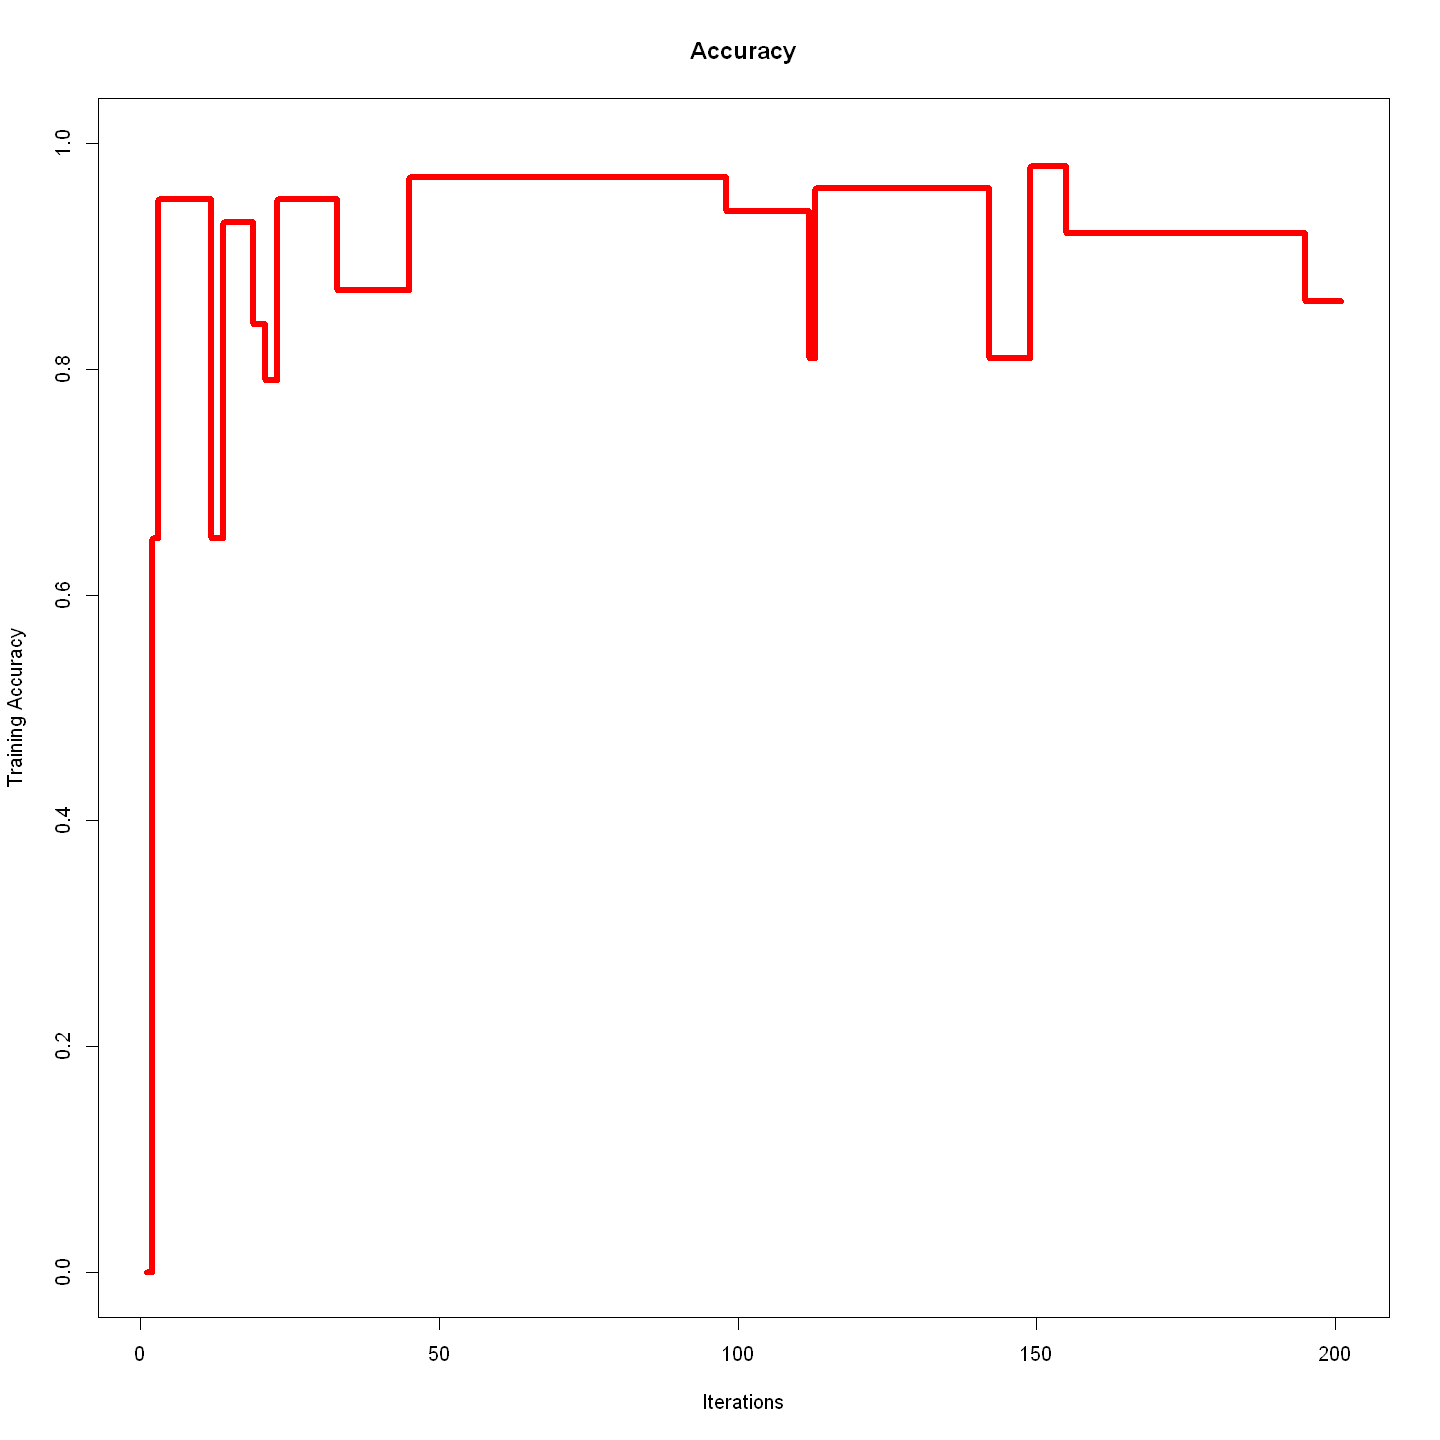

In [127]:
plot(training_accuracy,ylim=c(0.0,1.0),type='s',
     lwd=5,col='red',main="Accuracy",xlab="Iterations",
    ylab="Training Accuracy")